# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID: Vianny D'Souza 1001770237

Second Student Name and ID: Alay Parikh 1001774636



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load wine dataset from sklearn datasets. [1 points]
* while selecting best 3 attributes for training and testing your model. [2 points]
* Find the best K. [3 points]
* Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.[6 points]
* Plot the classifier in a 2D projection.[3 points]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
#Loading titanic dataset
from sklearn.datasets import load_iris
import numpy as np

#Loading from the Titanic dataset into dataframe
titanic_data = pd.read_csv("titanic.csv",sep = ',')

print(titanic_data.head(5))

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [21]:
# Preprocessing: we drop columns that dont affect the target variable
new_data = titanic_data.drop(['Name','Ticket'], 1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [22]:
#Preprocessing: checking to see if there are any null values
new_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
#Preprocessing: we eliminate columns with too many null values
new_data.drop(['Cabin'], 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
#Preprocessing: we're adding dummy columns for the attributes Sex and Embarked
prep = new_data[['Sex','Embarked']]
prep = pd.get_dummies(prep, drop_first=True)
prep.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [30]:
temp = new_data.drop(['Sex', 'Embarked','Cabin'], axis=1)
final_df = pd.concat([temp, prep], axis=1)
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
scaler = MinMaxScaler()
final_df = pd.DataFrame(scaler.fit_transform(final_df), columns = final_df.columns)
imputer = KNNImputer(n_neighbors=5)
final_df = pd.DataFrame(imputer.fit_transform(final_df),columns = final_df.columns)

In [32]:
final_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [33]:
#Finding if there are any duplicates
final_df.duplicated().sum()

final_df.drop_duplicates(inplace = True)
final_df.duplicated().sum()

0

<AxesSubplot:>

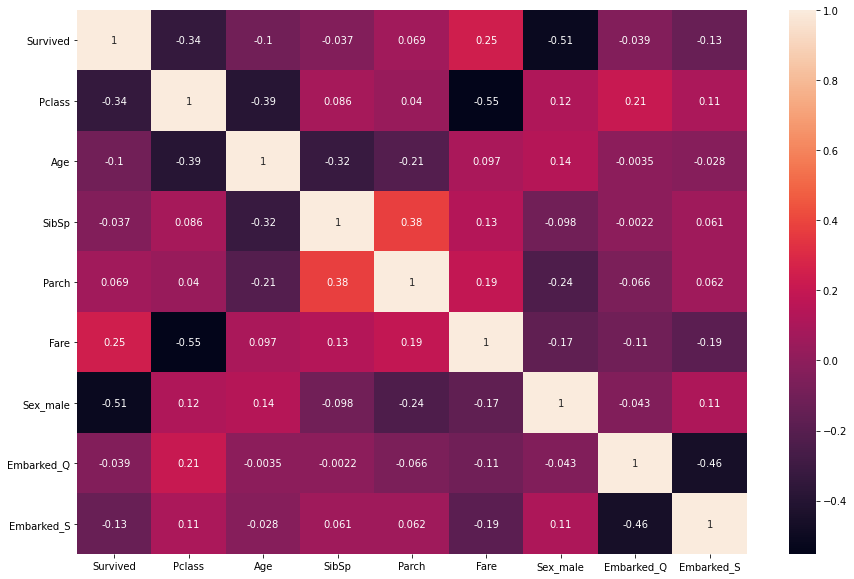

In [34]:
#Plotting graphs to select our best attribute
final_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(final_df.corr(),annot=True)

In [36]:
#Splitting the dat for test and train
X = final_df.drop('Survived', axis = 1)
y = final_df.Survived

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

knc= KNeighborsClassifier(n_neighbors=3)



In [38]:
# Fitting the KNN classifier to our train data set
model = knc.fit(X_train, y_train)


# Making prediction the created model
y_Predict = model.predict(X_test)

# Printing results like accuracy score, confusion matrix and classification report.
print("Accuracy:", accuracy_score(y_test, y_Predict),'\n')


print(confusion_matrix(y_test, y_Predict),'\n')


print("Classification report:", classification_report(y_test, y_Predict),'\n')

Accuracy: 0.7393162393162394 

[[107  24]
 [ 37  66]] 

Classification report:               precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       131
         1.0       0.73      0.64      0.68       103

    accuracy                           0.74       234
   macro avg       0.74      0.73      0.73       234
weighted avg       0.74      0.74      0.74       234
 



In [41]:
#Evaluating the second model
X = final_df.drop('Survived', axis = 1)
y = final_df.Survived

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


knc= KNeighborsClassifier(n_neighbors=5)



# Using the KNN classifier to our train data set
model2= knc.fit(X_train, y_train)


# Predicting on the created model
y_pred = model2.predict(X_test)


# Printing results like accuracy score, confusion matrix and classification report.
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')

print(confusion_matrix(y_test, y_pred),'\n')

print("Classification:", classification_report(y_test, y_pred),'\n')

Accuracy: 0.7564102564102564 

[[113  18]
 [ 39  64]] 

Classification:               precision    recall  f1-score   support

         0.0       0.74      0.86      0.80       131
         1.0       0.78      0.62      0.69       103

    accuracy                           0.76       234
   macro avg       0.76      0.74      0.75       234
weighted avg       0.76      0.76      0.75       234
 



In [43]:
#Evaluating the third model
X = final_df.drop('Survived', axis = 1)
y = final_df.Survived

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


knc= KNeighborsClassifier(n_neighbors=7)



# Using the KNN classifier to our train data set
model2= knc.fit(X_train, y_train)


# Predicting on the created model
y_pred = model2.predict(X_test)


# Printing results like accuracy score, confusion matrix and classification report.
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')

print(confusion_matrix(y_test, y_pred),'\n')

print("Classification:", classification_report(y_test, y_pred),'\n')

Accuracy: 0.7478632478632479 

[[112  19]
 [ 40  63]] 

Classification:               precision    recall  f1-score   support

         0.0       0.74      0.85      0.79       131
         1.0       0.77      0.61      0.68       103

    accuracy                           0.75       234
   macro avg       0.75      0.73      0.74       234
weighted avg       0.75      0.75      0.74       234
 



In [44]:
#Now calculating using Euclidean distance

X = final_df.drop('Survived', axis = 1)
y = final_df.Survived


# Splitting our data into test and train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


In [46]:
#Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knc_class= KNeighborsClassifier(n_neighbors=3)


# Fitting the KNN classifier to train data 
model4 = knc_class.fit(X_train, y_train)


# Searching best parameters using Random Search
params = { 'n_neighbors' : range(1,11),
          'metric' : ['euclidean'],
          'weights': ['uniform', 'distance']}
          

#Specifying folds
kfold = KFold(n_splits = 5)
        
randomsearch = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
randomsearch = randomsearch.fit(X_train, y_train)
randomsearch.best_params_

{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>